<a href="https://colab.research.google.com/github/Emilie-Jessen/AppML-Final-Project-2024/blob/main/Simon_ResNet_on_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# use ResNet to classify emotions from images of faces based on the labeled dataset from Kaggle in the archive directory
# the dataset is a collection of images of faces with labels for the emotion expressed in the face
# the dataset is split into a training set and a test set
# the training set is used to train the model
# the test set is used to evaluate the model

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Lambda, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image

show_putin = False



2024-05-29 14:34:45.947158: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 14:34:47.599315: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
if show_putin:
    #load a picture from archive and display it
    img = Image.open('archive/train/angry/im10.png')
    plt.imshow(img, cmap='gray')

#Use keras to create the train and test datasets
ds_train= keras.utils.image_dataset_from_directory(
    'archive/train',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=16,
    validation_split=0.2,
    subset='validation',
)



ds_test = keras.utils.image_dataset_from_directory(
    'archive/test',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=16,
)



Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
Found 7178 files belonging to 7 classes.


In [ ]:

# ONLY Dense7 output layer


#Use ResNet50 as the base model
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(48, 48, 3),
    pooling='avg',
)

#Freeze the base model
base_model.trainable = False

#Add a classification head
inputs = keras.Input(shape=(48, 48, 1))

# Convert grayscale images to RGB by duplicating the single channel three times
x = tf.keras.layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
outputs = Dense(7, activation='softmax')(x)
model = Model(inputs, outputs)



#Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)




In [ ]:


# Define the base model (ResNet50)
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(48, 48, 3),
    pooling=None,
)

# Freeze the base model
base_model.trainable = False

# Define the input layer with shape (48, 48, 1) for grayscale images
inputs = Input(shape=(48, 48, 1))

# Convert grayscale images to RGB by duplicating the single channel three times
x = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(inputs)

# Preprocess the RGB images for ResNet50
x = preprocess_input(x)

# Pass the preprocessed images to the ResNet50 model
x = base_model(x, training=False)


# outputs = Dense(7, activation='softmax')(x)  # 7 classes

# Add a global average pooling layer
x = GlobalAveragePooling2D()(x)

# # Add additional convolutional layers
# x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
# x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)
# x = Flatten()(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.5)(x)

# Add additional dense layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(7, activation='softmax')(x)  # 7 classes

# Create the final model
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Print the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 48, 48, 3) │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 48, 48)    │          0 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 48, 48)    │          0 │ lambda[0][0]      │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 48, 48)    │          0 │ lambda[0][0]      │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 48, 48, 3) │          0 │ get_item[0][0],   │
│                     │                   │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 48, 48, 3) │          0 │ stack[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 2, 2,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    262,272 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 7)         │        903 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,850,887 (90.98 MB)

 Trainable params: 263,175 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
#Train the model
history = model.fit(
    ds_train,
    epochs=10,
    verbose=2,
)


Epoch 1/10
180/180 - 20s - 113ms/step - accuracy: 0.2505 - loss: 2.0214
Epoch 2/10
180/180 - 14s - 79ms/step - accuracy: 0.2998 - loss: 1.7435
Epoch 3/10
180/180 - 15s - 81ms/step - accuracy: 0.3184 - loss: 1.6961
Epoch 4/10
180/180 - 15s - 84ms/step - accuracy: 0.3313 - loss: 1.6559
Epoch 5/10
180/180 - 15s - 83ms/step - accuracy: 0.3498 - loss: 1.6245
Epoch 6/10
180/180 - 15s - 83ms/step - accuracy: 0.3675 - loss: 1.5903
Epoch 7/10
180/180 - 15s - 84ms/step - accuracy: 0.3660 - loss: 1.5720
Epoch 8/10
180/180 - 14s - 80ms/step - accuracy: 0.3820 - loss: 1.5478
Epoch 9/10
180/180 - 15s - 81ms/step - accuracy: 0.3971 - loss: 1.5237
Epoch 10/10
180/180 - 14s - 80ms/step - accuracy: 0.3947 - loss: 1.5140


In [ ]:
#print loss history



# Save the model
# model.save('model')

# #Load the model
# model = keras.models.load_model('model')

# #Make predictions
# y_pred = model.predict(ds_test)


In [ ]:
# Evaluate the model
print('train set eval:',model.evaluate(ds_train))

print('test set eval:',model.evaluate(ds_test))

180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.4851 - loss: 1.3642
train set eval: [1.359854817390442, 0.4885908365249634]
225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.4071 - loss: 1.5563
test set eval: [1.5692427158355713, 0.399972140789032]


archive/test/surprised/im19.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[('angry', 0.0015587271), ('disgusted', 7.5548014e-05), ('fearful', 0.34158763), ('happy', 0.038419504), ('neutral', 0.6021594), ('sad', 0.00551499), ('surprised', 0.010684198)]
Predicted: neutral
Truth: surprised


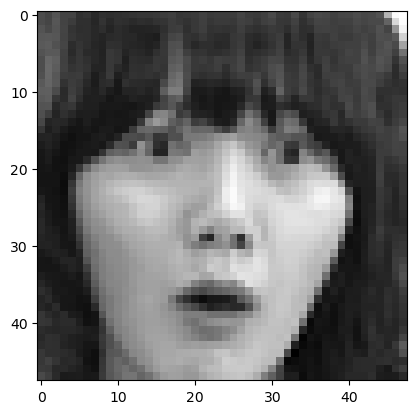

In [ ]:
#pick a random image from the test set, display it and predict the emotion
# img = Image.open('archive/test/angry/im100.png')

import random

emotions_list = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
emotion = random.choice(emotions_list)
rand_pic_name = f'archive/test/{emotion}/im{random.randint(1, 100)}.png'
img = Image.open(rand_pic_name)
print(rand_pic_name)




plt.imshow(img, cmap='gray')


predictions = model.predict(np.expand_dims(img, axis=0))
np.set_printoptions(suppress=True)          # print predictions in non-scientific notation


# zip the emotions list with the predictions and print them
print(list(zip(emotions_list, predictions[0])))
print('Predicted:', emotions_list[np.argmax(predictions[0])])
print('Truth:', emotion)
